# 결정 트리 모델의 시각화

Graphviz 패키지를 사용하여 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 볼 수 있습니다. 

## 기본 셋팅

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

## graphviz 설치

In [3]:
!pip install graphviz

## 결정 트리 모델 시각화

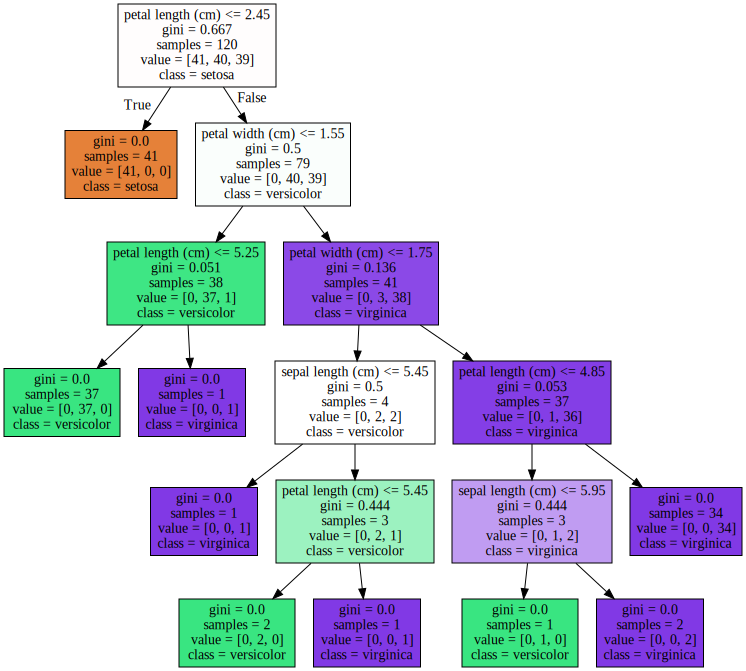

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 피처의 중요도 확인

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

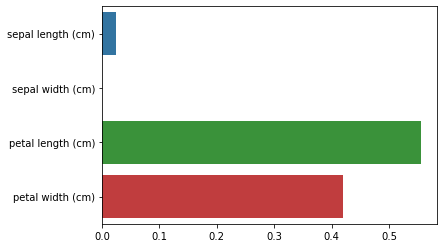

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

# 결정 트리 과적합

사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공

## 기본 셋팅

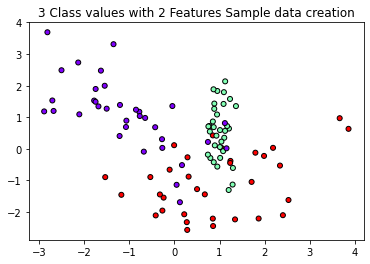

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

## 바운더리 시각화 함수

In [7]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

## 파라미터가 default인 결정트리를 학습하고 시각화

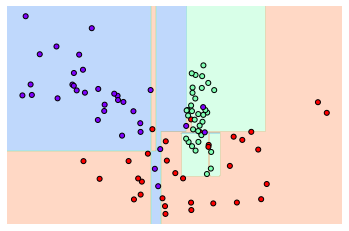

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치 데이터까지 분류하기 위해 분할이 일어나서 결정 기준 경계가 매우 많아진 과적화된 모습을 확인할 수 있습니다.

## min_samples_leaf = 6으로 설정하고 학습하고 시각화

sample 수가 6개 이하인 데이터는 리프노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화

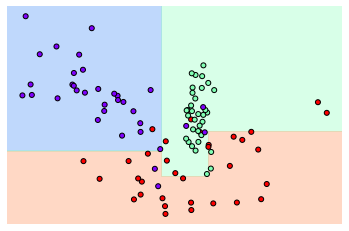

In [9]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 확인할 수 있습니다.

# 모델 구현

와인 데이터에 결정트리를 적용해보았습니다.

특징(feature)으로는 alcohol(도수), 당도(sugar), pH(산성)이 있고 class가 0이면 화이트와인, 1이면 레드와인입니다.

## 와인 데이터 불러오기

In [10]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [11]:
wine.info()

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


## 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(4547, 3) (1950, 3)


## 결정트리 학습

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('train 데이터 정확도 : ', dt_clf.score(X_train, y_train))
print('test 데이터 정확도 : ',dt_clf.score(X_test, y_test))
print('결정트리 예측 정확도 : {}'.format(accuracy))

train 데이터 정확도 :  0.9971409720694964
test 데이터 정확도 :  0.86
결정트리 예측 정확도 : 0.86


train 데이터의 정확도는 거의 1인데 test 데이터의 정확도는 상대적으로 낮은 것을 확인할 수 있습니다. 이는 결정트리에 특별하게 규제하지 않았기 때문에 모든 데이터를 제대로 분할하기 위해 깊이를 최대한 깊게한 것이기 때문에 과적합이 일어난 것을 확인할 수 있습니다.

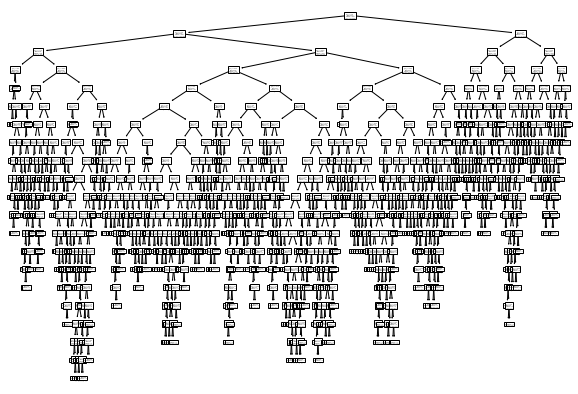

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt_clf)
plt.show()

한 눈에 봐도 매우 복잡하여 과적합이 일어난 것을 확인할 수 있습니다.

## 과적합 개선

결정 트리의 트리 깊이가 예측 정확도에 주는 영향을 살펴보겠습니다.(max_depth 조절)

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 4, 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8601
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6}


In [16]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,4,0.851326
1,6,0.860124
2,8,0.859907
3,10,0.859029
4,12,0.852213
5,16,0.854630
6,20,0.852431
7,24,0.852651


깊이가 6일 때 가장 정확도가 높은 것을 확인할 수 있습니다.

In [17]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth = 6)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('train 데이터 정확도 : {0:.4f}'.format(dt_clf.score(X_train, y_train)))
print('test 데이터 정확도 : {0:.4f}'.format(dt_clf.score(X_test, y_test)))
print('결정트리 예측 정확도 : {0:.4f}'.format(accuracy))

train 데이터 정확도 : 0.8777
test 데이터 정확도 : 0.8538
결정트리 예측 정확도 : 0.8538


max_depth = 6일때는 과적합이 일어나지 않은 것을 확인할 수 있습니다.

이제는 트리 깊이뿐만 아니라 min_samples_split까지 변경하면서 정확도 성능을 튜닝해보겠습니다.

In [18]:
params = {
    'max_depth' : [4, 6, 8, 12, 16 ,20], 
    'min_samples_split' : [8, 12, 16, 24, 30, 40],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV 최고 평균 정확도 수치: 0.8672
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 30}


In [19]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth = 8, min_samples_split = 30)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('train 데이터 정확도 : {0:.4f}'.format(dt_clf.score(X_train, y_train)))
print('test 데이터 정확도 : {0:.4f}'.format(dt_clf.score(X_test, y_test)))
print('결정트리 예측 정확도 : {0:.4f}'.format(accuracy))

train 데이터 정확도 : 0.8962
test 데이터 정확도 : 0.8554
결정트리 예측 정확도 : 0.8554


## 각 피처의 중요도 확인

Feature importances:
[0.166 0.665 0.169]
alcohol : 0.166
sugar : 0.665
pH : 0.169


<AxesSubplot:>

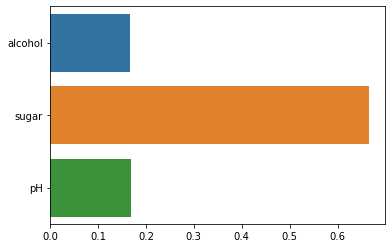

In [20]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(['alcohol', 'sugar', 'pH'], dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=['alcohol', 'sugar', 'pH'])